### 4、Python的模块和面向对象编程基础

### 4.1 模块

在Python中，模块是最高级别的程序组织单元，它将程序代码和数据打包以便重用，并提供自包含的命名空间，以最小化程序间的变量名冲突。具体来说，模块通常对应于Python程序文件。每个文件都是一个模块，模块之间相互导入以使用它们定义的名称。<br>模块通过两种方式导入，和一个函数进行重载：<br>
import：将模块作为一个整体导入<br>
from：从模块中导入指定的属性或者函数<br>
imp.reload：重新载入模块，而无需关闭Python<br>

#### 为什么使用模块？<br>
模块通过作为包含变量的自包含包（namespace），提供了一种简单的方法来将组件组织成一个系统。所有在模块文件中被定义的变量明都成为被导入的模块对象的属性。通过使用模块，我们可以将单独的文件组织成一个大型的程序系统。<br><br>
代码重用：模块允许我们将代码存储为文件，然后安装需求重复执行或载入，我们可以在模块中定义变量名，然后在其他程序中导入并使用。我们可以通过模块化设计，将不同的功能组织成可重用的代码单元。<br><br>
系统命名空间分区：模块是Python中最高级别的程序组织单元，模块本质上是一组变量名的集合，除非你显式地导入该文件，否则无法看到其他模块中的变量名，这有助于避免程序间的名称冲突。<br><br>
实现共享服务或数据：模块可以减小代码的冗余，需要重用代码只需要维护一个模块文件，当其他程序需要使用这段代码时，只需要导入这个模块即可使用。<br>

### 4.2 Python程序的结构
通常，Python程序不仅仅包含一个文件（除了最简单的脚本外），Python程序通常包含多个文件（模块）。

#### 如何组织Python程序
在基础层面上，一个Python程序有一个主要的顶层文件，以及零个或多个称为模块的补充文件。<br><br>
这是它的工作原理。顶层文件包含了程序的主要控制流程——这是你运行以启动应用程序的文件。模块文件是工具库，用于收集顶层文件使用的组件，也可能在其他地方使用。顶层文件使用模块文件中定义的工具，而模块则使用其他模块中定义的工具。<br><br>
通常模块文件在直接运行时通常不会执行任何操作，相反，他们定义了一系列工具以供其他模块导入并使用，当我们导入这个模块时，我们就可以使用这个模块中定义的属性，函数，对象等变量名。<br><br>
#### 导入与属性
如下图所示，一个Python程序由3个文件组成：a.py，b.py，c.py。a.py为顶层文件，当被启动时，它会从上到下执行代码，b.py，c.py为模块文件，他们通常不会被直接运行，而是在文件中定义了一系列属性，以供其他文件导入使用。

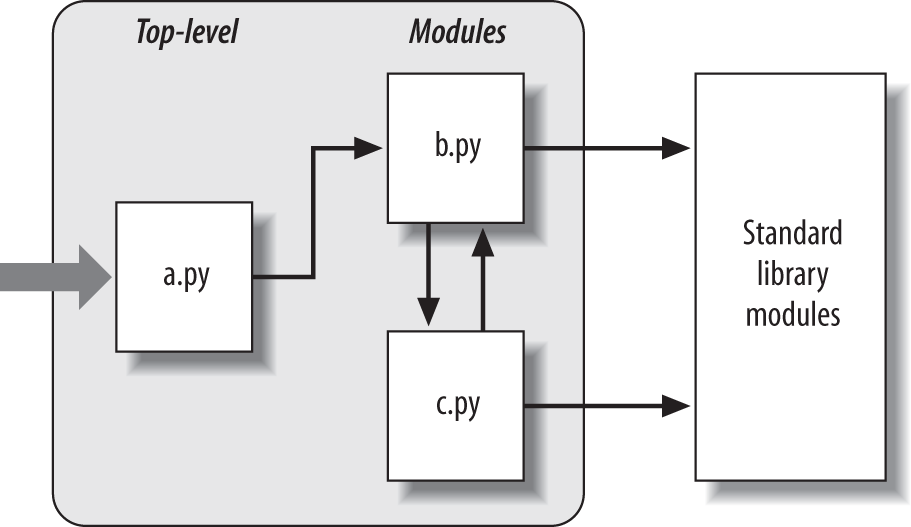

In [1]:
def spam(text):                # 在b.py中定义函数spam()
    print(text, 'spam')

In [17]:
#import sys
#sys.path.append('/kaggle/input/emaple')
import b                       # 在a.py中导入模块b
b.spam('gumby')                # 使用模块b中的函数spam()

gumby spam


当执行import语句时，Python会创建模块对象，并将模块名（b）赋值给模块对象。<br>
当模块a（a.py）调用模块b（b.py）中定义的函数spam时，代码b.spam表示：获取存储在对象b中的名称spam的值。

#### 标准库模块
注意上图中最右边的部分，由一些模块是由Python提供的，而不是我们自己编写的。
Python附带了大量实用模块，这些模块被称为标准库。标准库有超过200个核心模块。包含对常见编程任务的平台中立支持：操作系统接口、对象持久化、文本模式匹配、网络和互联网脚本、GUI构建等等。这些工具本身并不是Python语言的一部分，但你可以通过在任何标准Python安装中导入相应的模块来使用它们。因为它们是标准库模块，你也可以合理地确信它们将可用，并且在你运行Python的大多数平台上都能便携地工作。

### 4.3 import语句如何工作
1、查找模块文件<br>
2、将模块文件编译为二进制码（如果需要）<br>
3、运行模块以创建其中定义的对象<br><br>
#### 1、查找模块文件：<br>
首先，Python必须查找import语句引用的模块文件。注意，在上一节示例中的import语句命名文件时没有包含.py扩展名，也没有包含其目录路径：它只是说import b，而不是像import c:\dir1\b.py这样的东西。故意省略了路径和扩展名的细节；相反，Python使用标准的模块搜索路径和已知的文件类型来定位与import语句对应的模块文件。import模块搜索路径的顺序为：<br>
1、程序所在目录<br>
2、PYTHONPATH目录（环境变量，如果设置）<br>
3、标准库目录<br>
4、pth文件中指定的目录（如果包含此文件）<br>
5、第三方模块（site-packages）目录<br>
#### 2、将模块文件编译为二进制码（如果需要）<br>
Python会按需将模块编译为二进制码<br>
#### 3、运行模块以创建其中定义的对象<br>
import操作的最后一步是执行模块中的代码。文件中的所有语句依次从上到下运行，在此过程中对名称进行的任何赋值都会生成结果模块对象的属性。<br>
例如，文件中的def语句在导入时运行，以创建函数并将模块内的属性分配给这些函数。然后，程序中的其他文件可以在稍后通过导入来调用这些函数。<br>
由于这个最后的导入步骤实际上运行了文件的代码，如果模块文件中的任何顶层代码执行了实际工作，你将在导入时看到其结果。例如，模块中的顶层print语句在文件被导入时会显示输出。函数定义语句def则简单地定义了稍后使用的对象。<br>

#### 模块搜索路径：<br>
1、程序所在目录（自动）<br>
Python首先在程序所在目录中查找被导入的文件。因为这个目录总是首先被搜索，如果一个程序位于同一目录中，它的所有导入操作都会自动工作，无需配置路径。<br>
另一方面，因为这个目录首先被搜索，它的文件也会覆盖路径上其他地方同名目录中的模块；在实践中，应避免与标准库和第三方库中的模块命名相同，这样会覆盖掉标准库和第三方库中的模块<br><br>
2、PYTHONPATH目录（可配置）<br>
接下来，Python会按照从左到右的顺序搜索你的PYTHONPATH环境变量设置中列出的所有目录，你可以添加所有你希望从中导入的目录，Python将扩展模块搜索路径，以包括你的PYTHONPATH列出的所有目录。<br>
3、标准库目录（自动）<br>
接下来，Python自动搜索你的机器上安装的标准库模块所在的目录。因为这些目录总是被搜索，所以通常不需要配置。<br>
4、.pth文件中指定的目录（可配置）<br>
接下来，Python会查找.pth文本文件中所列出的路径（以.pth后缀结尾，代表“path”）。用户可以将需要搜索的路径添加.pth文件中。这个功能不常用，是PYTHONPATH目录的一种替代方案。<br>
5、第三方模块（site-packages）目录（自动）<br>
最后，Python自动将标准库的site-packages子目录添加到模块搜索路径中。按照惯例，这是大多数第三方扩展安装的地方，通过pip命令安装。因为它们的安装目录总是模块搜索路径的一部分，所以通常不需要配置。<br>

在程序运行时动态的配置模块搜索路径：


In [2]:
import sys
sys.path

['/kaggle/lib/kagglegym',
 '/kaggle/lib',
 '/opt/conda/lib/python310.zip',
 '/opt/conda/lib/python3.10',
 '/opt/conda/lib/python3.10/lib-dynload',
 '',
 '/root/.local/lib/python3.10/site-packages',
 '/opt/conda/lib/python3.10/site-packages',
 '/root/src/BigQuery_Helper']

In [3]:
sys.path.append('/kaggle/input/emaple')  #将'/kaggle/input/emaple'添加到系统查找路径（sys.path）
sys.path

['/kaggle/lib/kagglegym',
 '/kaggle/lib',
 '/opt/conda/lib/python310.zip',
 '/opt/conda/lib/python3.10',
 '/opt/conda/lib/python3.10/lib-dynload',
 '',
 '/root/.local/lib/python3.10/site-packages',
 '/opt/conda/lib/python3.10/site-packages',
 '/root/src/BigQuery_Helper',
 '/kaggle/input/emaple']

### 4.4 面向对象编程

面向对象编程（OOP）的概念：<br>
相较其他编程语言而言，Python中的面向对象编程更容易理解和使用，Python 中的大部分面向对象编程都可以归结为这个表达式：<br><br>
object.attribute<br><br>
我们一直使用这个表达式来访问模块属性、调用对象的方法等等。<br>
当我们在面向对象编程中使用这个表达式时，该表达式会在Python中触发一次搜索——它会在一棵由链接对象组成的树中搜索，寻找它能找到的第一个属性出现的地方。上述Python表达式可以翻译为：<br><br>
先在对象中查找，然后该对象所继承的所有类中从下到上、从左到右查找，直到找到属性的第一个出现的位置。<br>

In [8]:
class A:         #3、再然后在创建实例的类对象的继承的类中按从左到右的顺序查找
    a = 11
    pass
    
class B:         #4、最后查找的属性值
    a = 22
    pass
    
class C(A,B):    #2、然后在创建实例的类对象中查找
    a = 33
    pass

i = C()
i.a = 44         #1、首先在实例对象中查找
i.a

33

面向对象编程中的两个核心概念：<br><br>
**继承（Inheritance）：**继承是面向对象编程中的一种机制，允许一个类（子类）继承另一个类（父类）的属性和方法，从而复用代码、减少重复。通过继承，子类可以直接使用父类的功能，也可以通过重写方法（方法覆盖）来修改或扩展父类的行为。继承支持“is-a”关系，例如，一只狗（子类）是一个动物（父类）。这使得代码更具层次性和可扩展性。<br><br>
**组合（Composition）：**组合是一种将多个类的功能组合在一起的方式，通过将一个类的实例作为另一个类的属性，使其复合出更复杂的行为。不同于继承的“is-a”关系，组合表现为“has-a”关系，例如，一个房子“有”一扇门，这个门可以是独立的对象。组合提供了更灵活的代码结构，因为它不要求类之间有继承关系，可以更轻松地进行功能模块化和修改。<br><br>

### 4.5 面向对象编程语法<br>
#### **4.5.1 类与实例：**<br>
#### **类：**<br>
**class语句创建一个类对象并分配一个变量名：**就像函数定义语句def一样，Python的类定义语句class也是一个可执行语句。当执行到它时，它会生成一个新的类对象，并将其分配给类头部中的名称。同样，像def一样，类语句通常在包含它们的文件首次被导入时执行。<br>
**在class内部赋值的变量是类属性：**<br>类语句内（缩进代码块）的赋值会在类对象中生成属性。类语句定义了一个局部作用域，这个作用域转变成了类对象的属性命名空间，运行类语句后，类属性通过名称限定来访问：object.name。<br>
**类属性提供对象的状态和行为：**类对象的属性记录了所有由该类创建的实例要共享的状态信息和行为；嵌套在类内部的函数定义语句生成方法，这些方法处理实例。

### **实例：**<br>
**调用类对象会创建一个实例：**每次调查类时，会创建一个新的实例。<br>
**每个实例对象继承类的属性且有自己的命名空间：**从类创建的实例对象是新的命名空间；它们一开始是空的，但继承了生成它们的类对象中存在的属性。<br>
**在方法中对self属性的赋值会创建每个实例的属性:**在类的方法函数内部，第一个参数（按惯例称为self）引用正在处理的实例对象；对self属性的赋值会创建或更改实例中的数据，而不是类中的数据。

In [3]:
#第一个例子
>>> class FirstClass:               # 定义了一个名为FirstClass的类对象
        def setdata(self, value):   # 定义了一个类方法
            self.data = value       # self代表实例自己
        def display(self):
            print(self.data)        # self.data: 每个实例的data属性
            
x = FirstClass()                # 创建两个实例
y = FirstClass()                # 每个实例都是独立的命名空间（namespace）

In [4]:
x.setdata("King Arthur")    #调用方法，self是实例x
y.setdata(3.14159)          #运行: FirstClass.setdata(y, 3.14159)

In [5]:
x.display()                     # self.data 在每个实例中的值不同
y.display()                     # 运行: FirstClass.display(y)

King Arthur
3.14159


In [6]:
x.data = "New value"            # 可以访问或设置属性的值
x.display()                     # 使用display方法来打印实例x的data属性
x.anothername = "spam"          # 也可以设置其他的属性名
x.anothername

New value


'spam'

#### **4.5.2 类通过继承进行定制**

**父类（superclass）在类头部的括号中列出：**要使一个类从另一个类继承属性，只需在新类语句的头部行的括号中列出另一个类。继承的类通常称为子类，被继承的类是其超类。<br>
**类从它们的父类继承属性：**就像实例继承它们类中定义的属性名称一样，类继承它们超类中定义的所有属性名称；如果子类中不存在这些属性，Python在访问时会自动找到它们。
**实例从所有可访问的类继承属性：**每个实例从生成它的类以及该类的所有父类中继承变量名。当查找变量名时，Python会检查实例本身，然后是它的类，接着是所有的超类。
**每个object.attribute引用都会触发一次新的、独立的搜索：**对于每个属性获取表达式，Python都会对类树进行一次独立的搜索。这包括在类语句外部对实例和类的引用（例如，X.attr），以及对类方法函数中self实例属性的引用。方法中的每个self.attr表达式都会在self及其以上的类中引发对attr的新搜索。
**逻辑更改是通过子类化进行的，而不是通过更改超类：**通过在层次结构（类树）中较低的子类中重新定义超类名称，子类替换并因此定制继承的行为。

In [7]:
#第二个例子
class SecondClass(FirstClass):                   # SecondClass继承FirstClass中的setdata方法
    def display(self):                           # 通过定义display方法，来覆盖FirstClass中的display方法
        print('Current value = "%s"' % self.data)

In [8]:
z = SecondClass()
z.setdata(42)           # 在FirstClass查找setdata方法
z.display()             # 在SecondClass中重写（overridden）display方法

Current value = "42"


In [9]:
x.display()      #x仍然是FirstClass的实例，display方法也是原来的方法

New value


#### **4.5.3 类可以拦截（Intercept）Python操作符**

**以双下划线(__X__)命名的方法是特殊方法：**在Python类中，我们通过提供具有特殊名称的方法来实现操作符重载，以拦截操作。Python语言定义了从这些操作到具有特殊名称的方法的固定且不可更改的映射。<br>
**当实例出现在内置操作中时，这些方法会被自动调用：**例如，如果一个实例对象继承了一个__add__方法，那么每当该对象出现在+表达式中时，就会调用这个方法。该方法的返回值成为相应表达式的结果。<br>
**类可以覆盖大多数内置类型操作：**有数十个特殊的操作符重载方法名称，用于拦截和实现几乎所有内置类型可用的操作。这包括表达式，也包括打印和对象创建等基本操作。
**操作符重载方法没有默认值，也不是必需的：**如果一个类没有定义或继承操作符重载方法，这只意味着该类实例不支持相应的操作。例如，如果没有__add__方法，+表达式会引发异常。
**操作符允许类与Python的对象模型集成：**通过重载类型操作，我们用类实现的自定义对象可以表现得像内置对象一样，从而提供一致性以及与预期接口的兼容性。

__init__ 当新的实例创建时会执行: self是新的ThirdClass对象。

__add__ 当ThirdClass实例使用 +（加法表达式）时会执行。

__str__ 当使用打印（print）函数打印对象时，会执行__str__方法的代码。

In [10]:
#第三个例子
class ThirdClass(SecondClass):                     # 继承自SecondClass
    def __init__(self, value):                     # 在创建实例时，要求传入value参数：ThirdClass(value)"
        self.data = value
    def __add__(self, other):                      # 使用表达式+时（self + other）
        return ThirdClass(self.data + other)
    def __str__(self):                             # 使用print函数和str函数时，"print(self)", "str()"
        return '[ThirdClass: %s]' % self.data
    def mul(self, other):                          # 直接修改实例的data属性值
        self.data *= other

In [12]:
a = ThirdClass('abc')       #创建实例时调用__init__
a.display()                 #继承SecondClass的方法

Current value = "abc"


In [13]:
print(a)      #调用__str__方法，打印字符串

[ThirdClass: abc]


In [14]:
b = a + 'xyz'       #__add__创建一个新的实例
b.display()         #b继承ThirdClass的方法

Current value = "abcxyz"


In [15]:
print(b)           #调用__str__，打印字符串

[ThirdClass: abcxyz]


In [16]:
a.mul(3)          #mul方法，直接修改实例的值
print(a)

[ThirdClass: abcabcabc]


本节我们介绍了Python中面向对象编程的基础知识。我们学习了class语句的语法，并了解了如何利用它构建起一个类继承体系（实例属性的搜索顺序）。此外，我们还研究了Python自动为方法函数的第一个参数赋值的机制（self），学习了如何通过简单的赋值操作将属性绑定到类层次结构中的对象上，以及如何利用特定命名的运算符重载方法来拦截并实现我们实例的内置操作（如表达式计算和对象打印）。